# Data Wrangling Project

### INTRODUCTION
In this project i'll be gathering data from three different sources and then cleaning the data before perfoming analytical insights on it.
#### TABLE OF CONTENTS

<ul>
<li><a href="#data">Data Gathering</a></li>
<li><a href="#AGD">Assessing gathered data</a></li>
<li><a href="#DC">Data cleaning</a></li>
<li><a href="#S">Storing gathered data into a single file</a></li>
<li><a href="#EDA">Exploratory Data Analysis</a></li>
<li><a href="#data viz">Data Visualizations</a></li>
</ul>

In [88]:
# importing the necessary packages and libraries for this project
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Gathering <a id='data'></a>
In the cell below i'll be downloading one of our data from our directory into our notebook

In [89]:
# using the pandas library to download twitter archive file from my directory
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [90]:
# creating a variable for the tweet_ids that will be used later on for querying data from twitter's API
twitter_id =(twitter_archive.tweet_id)

In the cell below i'll be downloading our next required data using the `requests` library

In [91]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [92]:
with open('image_predictions.tsv', mode = 'wb')as file:
    file.write(response.content)

In [93]:
image_prediction = pd.read_table('image_predictions.tsv')

In the cells below i'll be querying twitter API using tweepy to get our needed data for this project

In [94]:
# inserting in my personalized identity for twitter authentication
consumer_key = '*******NoMvAQuV**********'
consumer_secret = '***************DpimsNsSMBfDDfxuDksI****************'
access_token = '**********iIONzHpeQZ3Hm9i***************'
access_token_secret = '*************tsAodr3RvakIoAO**************'

In [95]:
# authenticating to twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [96]:
api = tweepy.API(auth, wait_on_rate_limit = True)

In [97]:
# querying twitter API to get the data of all the id in our twitter_archive dataset 
missing_id = []
with open('tweet_json.txt', mode = 'w')as file:
    for i in twitter_id:
        try:
            dog_tweets = api.get_status(id = i, tweet_mode = 'extended')
            data = dog_tweets._json
            json.dump(data, file)
            file.write('\n')
        except:
            missing_id.append(i)
            print('the tweet for the id '+str(i) +' cannot be found')
            

the tweet for the id 888202515573088257 cannot be found
the tweet for the id 873697596434513921 cannot be found
the tweet for the id 872668790621863937 cannot be found
the tweet for the id 872261713294495745 cannot be found
the tweet for the id 869988702071779329 cannot be found
the tweet for the id 866816280283807744 cannot be found
the tweet for the id 861769973181624320 cannot be found
the tweet for the id 856602993587888130 cannot be found
the tweet for the id 856330835276025856 cannot be found
the tweet for the id 851953902622658560 cannot be found
the tweet for the id 851861385021730816 cannot be found
the tweet for the id 845459076796616705 cannot be found
the tweet for the id 844704788403113984 cannot be found
the tweet for the id 842892208864923648 cannot be found
the tweet for the id 837366284874571778 cannot be found
the tweet for the id 837012587749474308 cannot be found
the tweet for the id 829374341691346946 cannot be found
the tweet for the id 827228250799742977 cannot b

Rate limit reached. Sleeping for: 108


the tweet for the id 754011816964026368 cannot be found
the tweet for the id 680055455951884288 cannot be found


Rate limit reached. Sleeping for: 131


In [98]:
# creating a pandas dataframe with our just extracted data
twitter_extract = pd.read_json('tweet_json.txt', lines = True)

In [99]:
twitter_extract.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [100]:
# selecting specific columns i'd want to work with later on since i don't need all the columns and then assigning it to a variable
twitter_extract = twitter_extract[['id','display_text_range','retweet_count','favorite_count','lang', 'created_at']]

### Assessig gathered data <a id='AGD'></a>

In [101]:
# visual assessment of our 3 datasets

In [102]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [103]:
image_prediction

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [104]:
twitter_extract

id display_text_range  retweet_count  favorite_count  \
0     892420643555336193            [0, 85]           6961           33643   
1     892177421306343426           [0, 138]           5267           29198   
2     891815181378084864           [0, 121]           3463           21949   
3     891689557279858688            [0, 79]           7176           36712   
4     891327558926688256           [0, 138]           7707           35107   
...                  ...                ...            ...             ...   
2322  666049248165822465           [0, 120]             36              88   
2323  666044226329800704           [0, 137]            114             245   
2324  666033412701032449           [0, 130]             36             100   
2325  666029285002620928           [0, 139]             39             112   
2326  666020888022790149           [0, 131]            419            2280   

     lang                created_at  
0      en 2017-08-01 16:23:56+00:00  
1      en 2017-08-01 00:17:27+00:00  
2      en 2017-07-31 00:18:03+00:00  
3      en 2017-07-30 15:58:51+00:00  
4      en 2017-07-29 16:00:24+00:00  
...   ...                       ...  
2322   en 2015-11-16 00:24:50+00:00  
2323   en 2015-11-16 00:04:52+00:00  
2324   en 2015-11-15 23:21:54+00:00  
2325   en 2015-11-15 23:05:30+00:00  
2326   en 2015-11-15 22:32:08+00:00  

[2327 rows x 6 columns]

In [105]:
# programmatic assessment

In [106]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [107]:
twitter_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  2327 non-null   int64              
 1   display_text_range  2327 non-null   object             
 2   retweet_count       2327 non-null   int64              
 3   favorite_count      2327 non-null   int64              
 4   lang                2327 non-null   object             
 5   created_at          2327 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 109.2+ KB


In [108]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [175]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [110]:
image_prediction.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [111]:
twitter_archive.text.duplicated().any()

False

In [112]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [113]:
twitter_archive.duplicated().any()

False

In [114]:
image_prediction.duplicated().any()

False

In [115]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [116]:
all_columns = pd.Series(list(twitter_archive) + list(twitter_extract) + list(image_prediction))
all_columns[all_columns.duplicated()]

23    tweet_id
dtype: object

#### QUALITY ISSUES
>1. We want only original tweets in the `twitter_archive` table and the columns with the ovrall highest probability `image_prediction` table.
>2. Some of the observatons in the `text` columns are retweet and not the original tweet.
>3. Some tweets are not dog tweets or related to dogs in any way.
>4. Missing names in the `name` column of the twitter_archive table are represeted as 'None' instead  of Nan and inaccurate names too like 'a', 'such'.
>5.The `source` column of the twitter_archive table is in a html format and for that we can't do analysis on it.
>6. `timestamp` column in the twitter_archive table is an object instead of a datetime format.
>7. The `rating_numerator` column in the twitter_archive table have some outrageous ratings.
>8. The `rating_denominator` for the twitter_archive table is not in the standard WeRateDogs denominator rating format (all rating_denominator should be 10).
>9. Nulls represented as 'None' in the three tables.
>10. The `display_text_range` column in the twitter_extract table should contain a single value not a list. 

#### TIDINESS ISSUE
>1. Four observations are represented as columns in the twitter_archive table (doggo floofer pupper	puppo).
>2. Duplicated columns in the three tables.   



 ### Data cleaning <a id='DC'></a>
 

In [226]:
# creating a copy of our three datasets.
twitter_arch_clean = twitter_archive.copy()
tweet_extract_clean = twitter_extract.copy()
clean_image_predict = image_prediction.copy()

##### Define
Using the `.drop` method to remove columns and rows that are retweets in the `twitter_arch_clean` table and also trimming out irrelevant columns from the `clean_image_predict` tables.

##### Code

In [227]:
# dropping retweet (and less important) columns from the twitter_arch_clean table
twitter_arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', ], axis = 1, inplace = True)

In [228]:
# dropping columns with lesser probability levels and picking only the columns with the highest prediction score and image url
clean_image_predict.drop(['img_num','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis =1, inplace = True)

##### Test

In [229]:
# this code gives us a list of all our columns in the specified dataset
twitter_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [230]:
clean_image_predict.columns

Index(['tweet_id', 'jpg_url', 'p1'], dtype='object')

##### Define
Remove all text retweets in the `text` column by dropping the row

##### Code

In [231]:
# assigning all texts that are not retweets ('RT' or 'rt') to our table to replace the previous version of the `twitter_arch_clean` table 
twitter_arch_clean = twitter_arch_clean[~twitter_arch_clean.text.str.contains('^RT|^rt', regex = True)]

##### Test

In [232]:
# this code checks the table if there's any text in the text column that starts with 'RT' or 'rt' and returns a boolean
twitter_arch_clean.text.str.contains('^RT|^rt', regex = True).any()

False

##### Define
Remove all tweets not relating to dogs by using the str.contains method

##### Code

In [233]:
twitter_arch_clean = twitter_arch_clean[~twitter_arch_clean.text.str.contains('WE only rate dogs', case = False, regex = False)]

##### Test

In [234]:
twitter_arch_clean[twitter_arch_clean.text.str.contains('we rate dogs|we only rate dogs', case=False, regex = False)]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

##### Define
Replace all None and inaccurate dog names like 'a' in the name column with null

##### Code

In [235]:
wrong_names = twitter_arch_clean.name.str.islower() 
column_name = 'name'
twitter_arch_clean.loc[wrong_names, column_name] = np.nan

In [236]:
twitter_arch_clean['name'].replace('None', np.nan, inplace = True)

##### Test

In [237]:
twitter_arch_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

In [238]:
twitter_arch_clean.name.str.islower().any()

False

##### Define
changing the source column in the twitter_arch_clean table to a human readable format

##### Code

In [239]:
web = twitter_arch_clean.source
for i in web:
    print(i)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a h

<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphon

In [240]:
# using the str.extract method to find regular expressions in the source column
twitter_arch_clean["tweet_source"] = twitter_arch_clean.source.str.extract(r'(Twitter\s\w+\s\w{2,10})', expand  = False)


##### Test

In [241]:
twitter_arch_clean.sample(10)

tweet_id                  timestamp  \
1732  679828447187857408  2015-12-24 00:58:27 +0000   
1690  681339448655802368  2015-12-28 05:02:37 +0000   
723   782969140009107456  2016-10-03 15:42:44 +0000   
837   767754930266464257  2016-08-22 16:06:54 +0000   
1244  711743778164514816  2016-03-21 02:38:34 +0000   
1443  696744641916489729  2016-02-08 17:17:22 +0000   
258   843604394117681152  2017-03-19 23:25:35 +0000   
554   803773340896923648  2016-11-30 01:31:12 +0000   
2088  670792680469889025  2015-11-29 02:33:32 +0000   
512   811744202451197953  2016-12-22 01:24:33 +0000   

                                                 source  \
1732  <a href="http://twitter.com/download/iphone" r...   
1690  <a href="http://twitter.com/download/iphone" r...   
723   <a href="http://twitter.com/download/iphone" r...   
837   <a href="http://twitter.com/download/iphone" r...   
1244  <a href="http://twitter.com/download/iphone" r...   
1443  <a href="http://vine.co" rel="nofollow">Vine -...   
258   <a href="http://twitter.com/download/iphone" r...   
554   <a href="http://twitter.com/download/iphone" r...   
2088  <a href="http://twitter.com/download/iphone" r...   
512   <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
1732  Everybody look at this beautiful pupper 13/10 ...                13   
1690  This is Asher. He's not wearing a seatbelt or ...                 9   
723   This is Cali. She arrived preassembled. Conven...                12   
837   This is Philbert. His toilet broke and he does...                11   
1244  Meet Roosevelt. He's calculating the best case...                11   
1443  This is Klevin. He doesn't want his family bra...                10   
258   This is Hank. He's been outside for 3 minutes ...                11   
554   This is Diogi. He fell in the pool as soon as ...                12   
2088  This is Antony. He's a Sheraton Tetrahedron. S...                 7   
512   This is Halo. She likes watermelon. 13/10 http...                13   

      rating_denominator       name doggo floofer  pupper  puppo  \
1732                  10        NaN  None    None  pupper   None   
1690                  10      Asher  None    None    None   None   
723                   10       Cali  None    None    None   None   
837                   10   Philbert  None    None    None   None   
1244                  10  Roosevelt  None    None    None   None   
1443                  10     Klevin  None    None    None   None   
258                   10       Hank  None    None    None   None   
554                   10      Diogi  None    None    None  puppo   
2088                  10     Antony  None    None    None   None   
512                   10       Halo  None    None    None   None   

            tweet_source  
1732  Twitter for iPhone  
1690  Twitter for iPhone  
723   Twitter for iPhone  
837   Twitter for iPhone  
1244  Twitter for iPhone  
1443                 NaN  
258   Twitter for iPhone  
554   Twitter for iPhone  
2088  Twitter for iPhone  
512   Twitter for iPhone

##### Define
converting the timestamp column in the twitter_arch_clean table from a string to a datetime column.

##### Code

In [242]:
twitter_arch_clean.timestamp = pd.to_datetime(twitter_arch_clean.timestamp, errors = 'coerce', utc = True)

##### Test

In [243]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2119 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2119 non-null   int64              
 1   timestamp           2119 non-null   datetime64[ns, UTC]
 2   source              2119 non-null   object             
 3   text                2119 non-null   object             
 4   rating_numerator    2119 non-null   int64              
 5   rating_denominator  2119 non-null   int64              
 6   name                1390 non-null   object             
 7   doggo               2119 non-null   object             
 8   floofer             2119 non-null   object             
 9   pupper              2119 non-null   object             
 10  puppo               2119 non-null   object             
 11  tweet_source        2019 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

##### Define
All rating numerator in the twitter_arch_clean table should not have a value greater than fifteen.
(although the twitter page WeRateDogs have a unique rating system, for the purpose of this project i will be making the highest possible rating numerator to be 15 and reassign rating numerators greater than fifteen
to the overall mean value of the rating numerator.) 

##### Code

In [244]:
# replacing all rating_numerator greater than 15 with the overall mean value of the rating_numerator column
twitter_arch_clean[twitter_arch_clean.rating_numerator > 15] = int(twitter_arch_clean.rating_numerator.mean())

##### Test

In [245]:
twitter_arch_clean[twitter_arch_clean.rating_numerator > 15]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, tweet_source]
Index: []

In [246]:
 twitter_arch_clean.rating_numerator.value_counts()

12    486
10    429
11    414
13    329
9     147
8      96
7      53
14     42
5      36
6      32
3      18
4      17
2       9
1       8
0       2
15      1
Name: rating_numerator, dtype: int64

##### Define
All values in the rating_denominator  column should be 10

##### Code

In [247]:
twitter_arch_clean[twitter_arch_clean.rating_denominator != 10] = 10

##### Test

In [248]:
twitter_arch_clean.rating_denominator.value_counts()

10    2119
Name: rating_denominator, dtype: int64

##### Define
 replacing all 'None' rows with null using the `np.nan` function

##### Code

In [249]:
# replacing all 'None' values in the table with NaN
twitter_arch_clean.replace('None', np.nan, inplace = True)

In [250]:
clean_image_predict.replace('None', np.nan, inplace = True)

##### Test

In [251]:
clean_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   jpg_url   2075 non-null   object
 2   p1        2075 non-null   object
dtypes: int64(1), object(2)
memory usage: 48.8+ KB


In [252]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2119 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2119 non-null   int64 
 1   timestamp           2119 non-null   object
 2   source              2119 non-null   object
 3   text                2119 non-null   object
 4   rating_numerator    2119 non-null   int64 
 5   rating_denominator  2119 non-null   int64 
 6   name                1415 non-null   object
 7   doggo               118 non-null    object
 8   floofer             41 non-null     object
 9   pupper              264 non-null    object
 10  puppo               56 non-null     object
 11  tweet_source        2020 non-null   object
dtypes: int64(3), object(9)
memory usage: 215.2+ KB


In [253]:
tweet_extract_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  2327 non-null   int64              
 1   display_text_range  2327 non-null   object             
 2   retweet_count       2327 non-null   int64              
 3   favorite_count      2327 non-null   int64              
 4   lang                2327 non-null   object             
 5   created_at          2327 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 109.2+ KB


##### Define
melting Four observations represented as columns in the twitter_archive table (doggo floofer pupper puppo) into a single column `dog_stage` and droping the observations column

##### Code

In [254]:
def get_dog_stage(row: pd.Series) -> str or list:
    """
    Gets the dog stage e.g doggo, floofer etc.
    """
    # Get the list of dog stages based on their column values e.g -> [doggo, Nan, Nan, puppo]
    stage = [row.doggo, row.floofer, row.pupper, row.puppo] 
    
    # Reduce the list to only contain non null values -> [doggo, puppo]
    stages = [str(value) for value in stage if pd.notna(value)]
    
    """If there are two or more items in the list then return the two items as a string.
    Return the stage if there is only one item in the list otherwise, return None."""
    return ", ".join(stages) if len(stages) > 1 else stages[0] if len(stages) == 1 else None

In [255]:
twitter_arch_clean["dog_stage"] = twitter_arch_clean.apply(lambda row: get_dog_stage(row), axis=1)

In [256]:
twitter_arch_clean.drop(columns = {'doggo', 'floofer', 'pupper', 'puppo'}, axis = 1, inplace = True)

##### Test

In [257]:
twitter_arch_clean.sample(5)

tweet_id                  timestamp  \
918   756651752796094464  2016-07-23 00:46:50+00:00   
1100  735648611367784448  2016-05-26 01:47:51+00:00   
2347  666057090499244032  2015-11-16 00:55:59+00:00   
2123  670385711116361728  2015-11-27 23:36:23+00:00   
562   802600418706604034  2016-11-26 19:50:26+00:00   

                                                 source  \
918   <a href="http://twitter.com/download/iphone" r...   
1100  <a href="http://twitter.com/download/iphone" r...   
2347  <a href="http://twitter.com/download/iphone" r...   
2123  <a href="http://twitter.com/download/iphone" r...   
562   <a href="http://vine.co" rel="nofollow">Vine -...   

                                                   text  rating_numerator  \
918   This is Gert. He just wants you to be happy. 1...                11   
1100  *faints* 12/10 perfection in pupper form https...                12   
2347  My oh my. This is a rare blond Canadian terrie...                 9   
2123  Meet Larry. He's a Panoramic Benzoate. Can sho...                 8   
562   This is Bailey. She has mastered the head tilt...                11   

      rating_denominator    name        tweet_source dog_stage  
918                   10    Gert  Twitter for iPhone      None  
1100                  10     NaN  Twitter for iPhone    pupper  
2347                  10     NaN  Twitter for iPhone      None  
2123                  10   Larry  Twitter for iPhone      None  
562                   10  Bailey                 NaN      None

In [258]:
twitter_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'tweet_source', 'dog_stage'],
      dtype='object')

##### Define
converting the observations in the column `display_text_range` in the tweet_extract_clean table from a list to a single value and then renaming the column 

##### Code

In [259]:
# bringing out the text length from the text range that's in a list format
tweet_extract_clean['display_text_range'] = tweet_extract_clean["display_text_range"].apply(lambda row: row[1])

In [260]:
# renaming the display_text_range column
tweet_extract_clean.rename(columns = {'display_text_range':'display_text_length'}, inplace = True)

##### Test

In [261]:
tweet_extract_clean.sample(8)

id  display_text_length  retweet_count  favorite_count  \
219   847978865427394560                  140           2910               0   
882   757725642876129280                  115           1107            4238   
797   770293558247038976                   93           1346            5827   
1523  689143371370250240                  140            454            1859   
745   777684233540206592                   91           2712           10566   
11    889880896479866881                  107           4136           24450   
570   799297110730567681                   91           2546            9343   
900   754856583969079297                  115           2305            6413   

     lang                created_at  
219    en 2017-04-01 01:08:10+00:00  
882    en 2016-07-25 23:54:05+00:00  
797    en 2016-08-29 16:14:30+00:00  
1523   en 2016-01-18 17:52:38+00:00  
745    en 2016-09-19 01:42:24+00:00  
11     en 2017-07-25 16:11:53+00:00  
570    en 2016-11-17 17:04:16+00:00  
900    en 2016-07-18 01:53:28+00:00

#### Storing gathered data into a single file <a id='S'></a>

In [262]:
tweet_extract_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [263]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2119 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2119 non-null   int64 
 1   timestamp           2119 non-null   object
 2   source              2119 non-null   object
 3   text                2119 non-null   object
 4   rating_numerator    2119 non-null   int64 
 5   rating_denominator  2119 non-null   int64 
 6   name                1415 non-null   object
 7   tweet_source        2020 non-null   object
 8   dog_stage           374 non-null    object
dtypes: int64(3), object(6)
memory usage: 165.5+ KB


In [264]:
clean_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   jpg_url   2075 non-null   object
 2   p1        2075 non-null   object
dtypes: int64(1), object(2)
memory usage: 48.8+ KB


In [265]:
tweet_extract_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2327 non-null   int64              
 1   display_text_length  2327 non-null   int64              
 2   retweet_count        2327 non-null   int64              
 3   favorite_count       2327 non-null   int64              
 4   lang                 2327 non-null   object             
 5   created_at           2327 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 109.2+ KB


In [266]:
twitter_archived= pd.merge(tweet_extract_clean, clean_image_predict, on=['tweet_id'])

In [267]:
twitter_archive_master= pd.merge(twitter_arch_clean, twitter_archived, on=['tweet_id'])

In [268]:
# converting the timestamp column into a datetime format
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp, errors = 'coerce', utc = True)

In [269]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 1909
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             1910 non-null   int64              
 1   timestamp            1910 non-null   datetime64[ns, UTC]
 2   source               1910 non-null   object             
 3   text                 1910 non-null   object             
 4   rating_numerator     1910 non-null   int64              
 5   rating_denominator   1910 non-null   int64              
 6   name                 1337 non-null   object             
 7   tweet_source         1901 non-null   object             
 8   dog_stage            304 non-null    object             
 9   display_text_length  1910 non-null   int64              
 10  retweet_count        1910 non-null   int64              
 11  favorite_count       1910 non-null   int64              
 12  lang                

In [270]:
# dropping the source column since we now have a tweet_source column
twitter_archive_master.drop('source', axis =1, inplace = True)

In [271]:
# testing to see if it works
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'tweet_source', 'dog_stage',
       'display_text_length', 'retweet_count', 'favorite_count', 'lang',
       'created_at', 'jpg_url', 'p1'],
      dtype='object')

In [272]:
# renaming the p1 column to dog_breed
twitter_archive_master.rename(columns = {'p1':'dog_breed'}, inplace = True)

In [273]:
# checking to see if changes are in place
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'tweet_source', 'dog_stage',
       'display_text_length', 'retweet_count', 'favorite_count', 'lang',
       'created_at', 'jpg_url', 'dog_breed'],
      dtype='object')

In [274]:
twitter_archive_master.reset_index()

index            tweet_id                 timestamp  \
0         0  892420643555336193 2017-08-01 16:23:56+00:00   
1         1  892177421306343426 2017-08-01 00:17:27+00:00   
2         2  891815181378084864 2017-07-31 00:18:03+00:00   
3         3  891689557279858688 2017-07-30 15:58:51+00:00   
4         4  891327558926688256 2017-07-29 16:00:24+00:00   
...     ...                 ...                       ...   
1905   1905  666049248165822465 2015-11-16 00:24:50+00:00   
1906   1906  666044226329800704 2015-11-16 00:04:52+00:00   
1907   1907  666033412701032449 2015-11-15 23:21:54+00:00   
1908   1908  666029285002620928 2015-11-15 23:05:30+00:00   
1909   1909  666020888022790149 2015-11-15 22:32:08+00:00   

                                                   text  rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...                13   
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
3     This is Darla. She commenced a snooze mid meal...                13   
4     This is Franklin. He would like you to stop ca...                12   
...                                                 ...               ...   
1905  Here we have a 1949 1st generation vulpix. Enj...                 5   
1906  This is a purebred Piers Morgan. Loves to Netf...                 6   
1907  Here is a very happy pup. Big fan of well-main...                 9   
1908  This is a western brown Mitsubishi terrier. Up...                 7   
1909  Here we have a Japanese Irish Setter. Lost eye...                 8   

      rating_denominator      name        tweet_source dog_stage  \
0                     10   Phineas  Twitter for iPhone      None   
1                     10     Tilly  Twitter for iPhone      None   
2                     10    Archie  Twitter for iPhone      None   
3                     10     Darla  Twitter for iPhone      None   
4                     10  Franklin  Twitter for iPhone      None   
...                  ...       ...                 ...       ...   
1905                  10       NaN  Twitter for iPhone      None   
1906                  10       NaN  Twitter for iPhone      None   
1907                  10       NaN  Twitter for iPhone      None   
1908                  10       NaN  Twitter for iPhone      None   
1909                  10       NaN  Twitter for iPhone      None   

      display_text_length  retweet_count  favorite_count lang  \
0                      85           6961           33643   en   
1                     138           5267           29198   en   
2                     121           3463           21949   en   
3                      79           7176           36712   en   
4                     138           7707           35107   en   
...                   ...            ...             ...  ...   
1905                  120             36              88   en   
1906                  137            114             245   en   
1907                  130             36             100   en   
1908                  139             39             112   en   
1909                  131            419            2280   en   

                    created_at  \
0    2017-08-01 16:23:56+00:00   
1    2017-08-01 00:17:27+00:00   
2    2017-07-31 00:18:03+00:00   
3    2017-07-30 15:58:51+00:00   
4    2017-07-29 16:00:24+00:00   
...                        ...   
1905 2015-11-16 00:24:50+00:00   
1906 2015-11-16 00:04:52+00:00   
1907 2015-11-15 23:21:54+00:00   
1908 2015-11-15 23:05:30+00:00   
1909 2015-11-15 22:32:08+00:00   

                                              jpg_url               dog_breed  
0     https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                  orange  
1     https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg               Chihuahua  
2     https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg               Chihuahua  
3     https://pbs.twi

#### Exploratory Data Analysis <a id='EDA'></a>
checking for any relationship between favorite counts and retweet counts

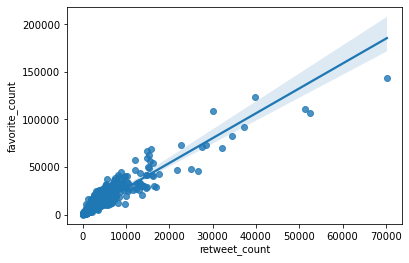

In [275]:
sns.regplot(data = twitter_archive_master, x='retweet_count', y= 'favorite_count', x_jitter=0.4);

In [276]:
# checking for the most commonly used langauge in our dataset
twitter_archive_master.lang.value_counts()

en    1903
nl       3
in       2
eu       1
et       1
Name: lang, dtype: int64

In [277]:
# this code gives us the top 5 dogs with the highest favorite counts
twitter_archive_master.nlargest(5,'favorite_count')

tweet_id                 timestamp  \
736  744234799360020481 2016-06-18 18:26:18+00:00   
291  822872901745569793 2017-01-21 18:26:02+00:00   
376  807106840509214720 2016-12-09 06:17:20+00:00   
102  866450705531457537 2017-05-22 00:28:40+00:00   
768  739238157791694849 2016-06-04 23:31:25+00:00   

                                                  text  rating_numerator  \
736  Here's a doggo realizing you can stand in a po...                13   
291  Here's a super supportive puppo participating ...                13   
376  This is Stephan. He just wants to help. 13/10 ...                13   
102  This is Jamesy. He gives a kiss to every other...                13   
768  Here's a doggo blowing bubbles. It's downright...                13   

     rating_denominator     name        tweet_source dog_stage  \
736                  10      NaN  Twitter for iPhone     doggo   
291                  10      NaN  Twitter for iPhone     puppo   
376                  10  Stephan  Twitter for iPhone      None   
102                  10   Jamesy  Twitter for iPhone    pupper   
768                  10      NaN  Twitter for iPhone     doggo   

     display_text_length  retweet_count  favorite_count lang  \
736                   91          70221          144052   en   
291                   87          39700          123523   en   
376                   61          51344          111058   en   
102                  106          30026          108397   en   
768                  114          52552          106650   en   

                   created_at  \
736 2016-06-18 18:26:18+00:00   
291 2017-01-21 18:26:02+00:00   
376 2016-12-09 06:17:20+00:00   
102 2017-05-22 00:28:40+00:00   
768 2016-06-04 23:31:25+00:00   

                                               jpg_url           dog_breed  
736  https://pbs.twimg.com/ext_tw_video_thumb/74423...  Labrador_retriever  
291    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg    Lakeland_terrier  
376  https://pbs.twimg.com/ext_tw_video_thumb/80710...           Chihuahua  
102    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg      French_bulldog  
768  https://pbs.twimg.com/ext_tw_video_thumb/73923...          Eskimo_dog

In [278]:
# this code checks and shows us what device do most of our tweets come from
twitter_archive_master.tweet_source.value_counts()

Twitter for iPhone    1873
Twitter Web Client      28
Name: tweet_source, dtype: int64

In [279]:
# writing a code to check the average text length in our master dataset
twitter_archive_master.display_text_length.mean()

111.30261780104712

#### Data Visualizations <a id='data viz'></a>

checking for the top 10 most common breeds of dog in our dataset

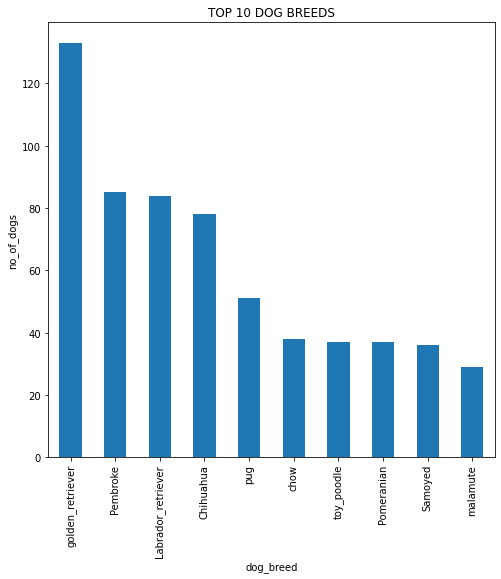

In [280]:
twitter_archive_master.dog_breed.value_counts().nlargest(10).plot(kind = 'bar', xlabel = 'dog_breed', ylabel = 'no_of_dogs', figsize = (8,8), title = 'TOP 10 DOG BREEDS');

<AxesSubplot:ylabel='dog_stage'>

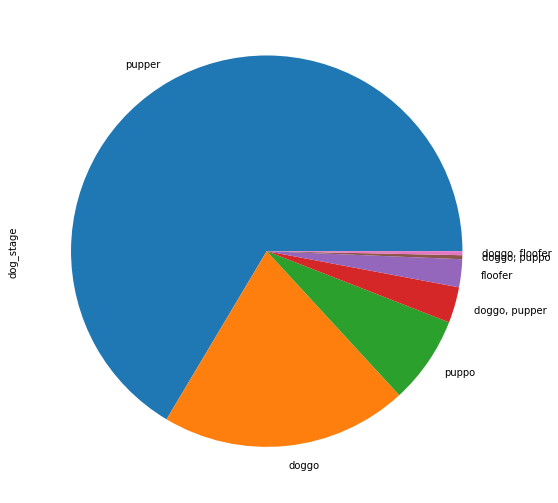

In [281]:
twitter_archive_master.dog_stage.value_counts().plot(kind = 'pie', figsize = (9,9))

##### Saving the `twitter_archive_master` dataset into a csv file

In [282]:
twitter_archive_master.to_csv('twitter_archive_master_dataset.csv', index = False)